In [1]:
import pandas as pd
from sklearn import svm
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
sns.set(color_codes=True)

In [2]:
data =pd.read_pickle('final_dataframe.pkl')
data.head()


,Flattened_olr,Amplitude,MISO1,MISO2,Phase
1998-02-02,"[142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142...",0.271886,0.120646,-0.252943,0
1998-02-03,"[141.4, 141.4, 141.4, 141.4, 141.4, 141.4, 141...",0.318955,0.101532,-0.312871,0
1998-02-04,"[147.05, 147.05, 147.05, 147.05, 147.05, 147.0...",0.356638,0.075671,-0.360043,0
1998-02-05,"[151.65, 151.65, 151.65, 151.65, 151.65, 151.6...",0.460725,0.042925,-0.473440,0
1998-02-06,"[140.95, 140.95, 140.95, 140.95, 140.95, 140.9...",0.465203,0.043117,-0.478062,0


In [3]:
OLR = data.iloc[:,0]
Phase = data.iloc[:, 4]
MISO1 = data.iloc[:,2]
MISO2 = data.iloc[:,3]
Amplitude = data.iloc[:,1]


In [4]:
#Separating Training set and test set
msk = np.random.rand(len(OLR)) < 0.8
x_train = OLR[msk]
x_test = OLR[~msk]
y_train = Phase[msk]
y_test = Phase[~msk]


x_train_list = x_train.tolist()
x_test_list = x_test.tolist()
y_train_list= y_train.tolist()
y_test_list = y_test.tolist()

In [5]:
clf =svm.SVC(kernel = 'poly', coef0=3)
clf.fit(x_train_list, y_train_list)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=3,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = clf.predict(x_test_list)

In [7]:
confusion_matrix =confusion_matrix(y_test_list, y_pred)

In [8]:
#Making a dataframe to compare predicted and actual class
comparision_df = pd.DataFrame(y_test)
comparision_df['Predicted_Phase']=y_pred
comparision_df =comparision_df.join(MISO1)
comparision_df = comparision_df.join(MISO2)
comparision_df = comparision_df.join(Amplitude)

comparision_df.head()

,Phase,Predicted_Phase,MISO1,MISO2,Amplitude
1998-02-06,0,0,0.043117,-0.478062,0.465203
1998-02-09,0,0,-0.037368,-0.472886,0.459729
1998-02-21,0,0,-0.044256,0.103623,0.109297
1998-02-23,0,0,-0.074285,0.103655,0.123835
1998-02-25,0,0,-0.065677,0.065227,0.089972


In [9]:

#Collecting Incorrectly Predicted Data
incorrectly_predicted = comparision_df[~(comparision_df.Phase == comparision_df.Predicted_Phase)]
incorrectly_predicted.head()

,Phase,Predicted_Phase,MISO1,MISO2,Amplitude
1998-08-11,7,0,-2.289053,-0.785056,2.357572
1998-08-12,7,0,-2.423728,-0.583769,2.429510
1998-08-21,5,4,-0.214877,1.576808,1.542408
1998-08-23,4,0,0.859142,1.506024,1.682745
1998-08-24,4,3,1.211423,1.314118,1.736807


In [10]:
incorrectly_predicted.describe()

,Phase,Predicted_Phase,MISO1,MISO2,Amplitude
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,3.755952,2.095238,0.068260,-0.336436,2.054545
std,2.732587,2.809816,1.601284,1.540708,0.728744
min,0.000000,0.000000,-4.339673,-3.385968,0.468625
25%,1.000000,0.000000,-1.261161,-1.589167,1.652439
50%,4.000000,0.000000,0.159620,-0.371172,1.933331
75%,6.000000,4.000000,1.378767,1.101365,2.439760
max,8.000000,8.000000,3.680321,3.168564,4.282391


In [11]:
#Collecting Correctly Predicted Data
correctly_predicted = comparision_df[~(comparision_df.Phase != comparision_df.Predicted_Phase)]
correctly_predicted.head()


,Phase,Predicted_Phase,MISO1,MISO2,Amplitude
1998-02-06,0,0,0.043117,-0.478062,0.465203
1998-02-09,0,0,-0.037368,-0.472886,0.459729
1998-02-21,0,0,-0.044256,0.103623,0.109297
1998-02-23,0,0,-0.074285,0.103655,0.123835
1998-02-25,0,0,-0.065677,0.065227,0.089972


In [12]:
#Got this code from sklearn confusion matrix documentation
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




Confusion matrix, without normalization
[[826   1   5   2   2   2   3   6   2]
 [ 19  20   4   0   0   0   0   0   2]
 [ 13   3  17   2   0   0   1   0   2]
 [  7   1   4  29   0   0   0   0   0]
 [ 13   0   1   4  20   2   0   0   0]
 [  8   0   0   0   2  14   4   0   0]
 [ 12   0   0   0   1   1  21   0   0]
 [  7   2   0   0   0   0   4  11   5]
 [ 10   5   0   0   0   0   1   5  16]]


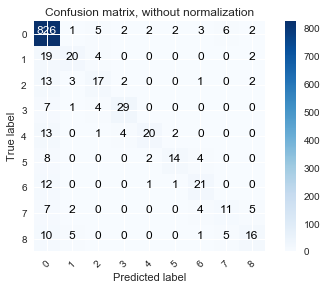

In [13]:

# Plot non-normalized confusion matrix
plt.figure()


plot_confusion_matrix(confusion_matrix, classes=['0','1','2','3','4','5','6','7','8'],title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[ 0.97290931  0.00117786  0.00588928  0.00235571  0.00235571  0.00235571
   0.00353357  0.00706714  0.00235571]
 [ 0.42222222  0.44444444  0.08888889  0.          0.          0.          0.
   0.          0.04444444]
 [ 0.34210526  0.07894737  0.44736842  0.05263158  0.          0.
   0.02631579  0.          0.05263158]
 [ 0.17073171  0.02439024  0.09756098  0.70731707  0.          0.          0.
   0.          0.        ]
 [ 0.325       0.          0.025       0.1         0.5         0.05        0.
   0.          0.        ]
 [ 0.28571429  0.          0.          0.          0.07142857  0.5
   0.14285714  0.          0.        ]
 [ 0.34285714  0.          0.          0.          0.02857143  0.02857143
   0.6         0.          0.        ]
 [ 0.24137931  0.06896552  0.          0.          0.          0.
   0.13793103  0.37931034  0.17241379]
 [ 0.27027027  0.13513514  0.          0.          0.          0.
   0.02702703  0.13513514  0.43243243]]


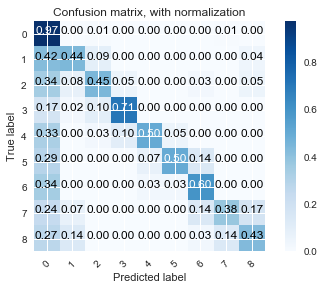

In [14]:
# Plot normalized confusion matrix
plt.figure()


plot_confusion_matrix(confusion_matrix, classes=['0','1','2','3','4','5','6','7','8'],title='Confusion matrix, with normalization', normalize= True)
plt.show()

In [15]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=3,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)